In [1]:
import fastbook
fastbook.setup_book()

from fastbook import *

In [2]:
path = Path('images/mixedimages/')
path.ls()

(#5) [Path('images/mixedimages/random.vehicle.audi.a2'),Path('images/mixedimages/random.vehicle.audi.etron'),Path('images/mixedimages/random.vehicle.audi.tt'),Path('images/mixedimages/random.vehicle.volkswagen.t2'),Path('images/mixedimages/random.vehicle.volkswagen.t2_2021')]

In [6]:
cars = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items = get_image_files,
                splitter = RandomSplitter(valid_pct=0.2, seed=42),
                get_y = parent_label,
                item_tfms = RandomResizedCrop(200, min_scale=0.5),
                batch_tfms = aug_transforms(mult=2)
               )
# loading in the data with a batch size of 32, using fast.ai dataloaders
dls = cars.dataloaders(path, bs = 16)

['random.vehicle.audi.a2', 'random.vehicle.audi.etron', 'random.vehicle.audi.tt', 'random.vehicle.volkswagen.t2', 'random.vehicle.volkswagen.t2_2021']
['audi.a2', 'audi.etron', 'audi.tt', 'volkswagen.t2', 'volkswagen.t2_2021']


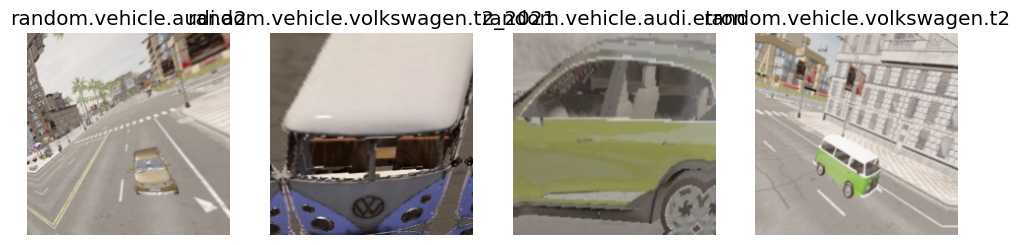

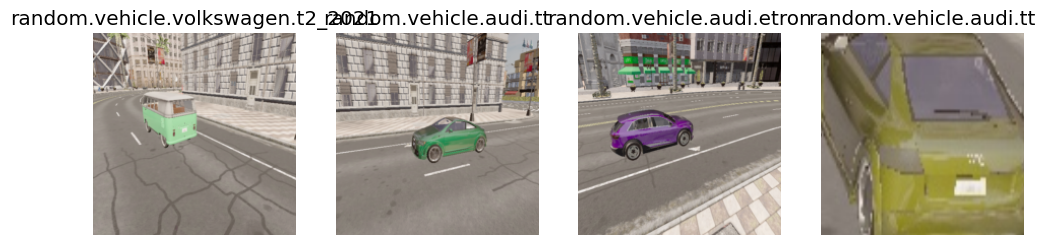

In [19]:
dls.train.show_batch(max_n=4, nrows=1)
dls.valid.show_batch(max_n=4, nrows=1)

print(dls.train.vocab)
print(dls.vocab)

epoch,train_loss,valid_loss,error_rate,time
0,0.569620,0.136164,0.046748,12:16
1,0.232814,0.056088,0.011803,12:28
2,0.194058,0.109284,0.006711,11:11
3,0.113312,0.062273,0.006017,10:42
4,0.071928,0.032658,0.003471,09:02


epoch,train_loss,valid_loss,error_rate,time
0,0.108644,0.053049,0.003471,12:56
1,0.063477,0.034612,0.002777,10:47
2,0.034971,0.031300,0.002546,11:10
3,0.038386,0.054177,0.002314,11:06
4,0.035749,0.034907,0.002314,10:55


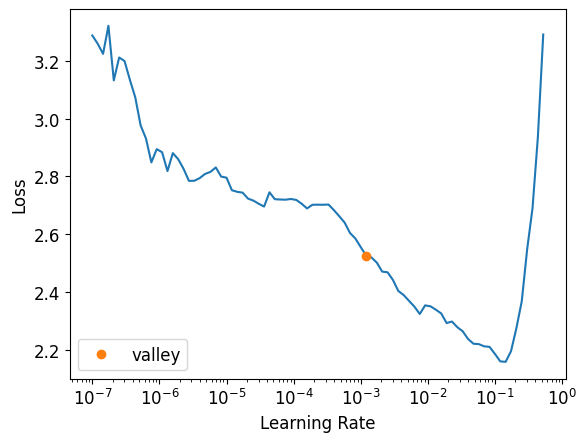

In [10]:
resnet50_model = vision_learner(dls, resnet50, metrics=error_rate)

resnet50_model.lr_find()

resnet50_model.fit_one_cycle(5, lr_max=slice(1e-3,1e-2))

#resnet50_model.fine_tune(1, base_lr=3e-3, freeze_epochs=4)
resnet50_model.unfreeze()
resnet50_model.fit_one_cycle(5, lr_max=slice(1e-5,1e-4))

resnet50_model.export('resnet50_modelmixedimages.pkl')



In [11]:
resnet50_model.predict('images/mixedimages/random.vehicle.audi.tt/ang0.3h2.64p-25.73dist8.74lshift2.08color78,48,37.png')

('random.vehicle.audi.tt',
 tensor(2),
 tensor([5.3547e-05, 1.6981e-03, 9.9821e-01, 1.4157e-05, 2.6743e-05]))

In [63]:
# print(resnet50_model.dls.vocab)
# print(resnet50_model.dls.valid.vocab)
# #reduce size of names so they don't overlap
# resnet50_model.dls.valid.vocab = ["a2", "etron", "tt", "t2", "t2_2021"]
interp = ClassificationInterpretation.from_learner(resnet50_model)

interp.plot_confusion_matrix()
#interp.plot_top_losses(10)
interp.plot_top_losses(5, nrows=5)